In [2]:
import datacube
import xarray as xr
import rasterio
import matplotlib.pyplot as plt
import uuid
from pathlib import Path
import yaml
from hashlib import md5
# from osgeo import osr
import glob
# from osgeo import gdal

import numpy as np
import pandas as pd
import joblib

import geopandas as gpd

In [137]:
inuit = gpd.GeoDataFrame.from_file(r"C:\stuff_pract\CxC_hackaton\other_data\Premiere_Nation_First_Nation.shp")

In [3]:
dc = datacube.Datacube(app="modis_lai")

In [4]:
res=0.0045000045000045
bounds = [-120, 49, -110, 60]
q_time=('2006', '2021')
output_crs='EPSG:4326'

query = {
    'product': 'modis_ndvi',
    'output_crs': output_crs,
    'resolution': (-res, res),
    'time': ('2021-5-10', '2021-9-20'),
    'lat': (bounds[1], bounds[3]),
    'lon': (bounds[0], bounds[2]),
}
modis_ndvi_dc_test = dc.load(**query)

In [5]:
wf_df = pd.read_excel('fp-historical-wildfire-data-2006-2021.xlsx')

In [102]:

wf_df_years = wf_df.copy()
wf_df_years.loc[1291, 'fire_start_date'] = wf_df_years.loc[1291, 'fire_start_date'].replace('1021', '2021')
wf_df_years.loc[14316, 'fire_start_date'] = wf_df_years.loc[14316, 'fire_start_date'].replace('0201', '2011')
wf_df_years['fire_start_date'] = pd.to_datetime(wf_df_years['fire_start_date'])

years = np.arange(2006, 2022)#[2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2010]
# wf_df_years = wf_df_years[(wf_df_years.fire_year.isin(years)) & (wf_df_years.current_size > 0.01)]
wf_df_years = wf_df_years[(wf_df_years.fire_year.isin(years)) & (wf_df_years.current_size > 0.01)]
# wf_df_years = wf_df_years[(~pd.isna(wf_df_years.fire_fighting_start_size) | (wf_df_years.current_size > 1)) & (wf_df_years.current_size > 0.1)]
wf_df_years = wf_df_years[((wf_df_years.general_cause_desc == 'Incendiary') & (wf_df_years.current_size > 1)) | (wf_df_years.general_cause_desc != 'Incendiary')]

# wf_df_years.fire_start_date = pd.to_datetime(wf_df_years.fire_start_date, errors='coerce')

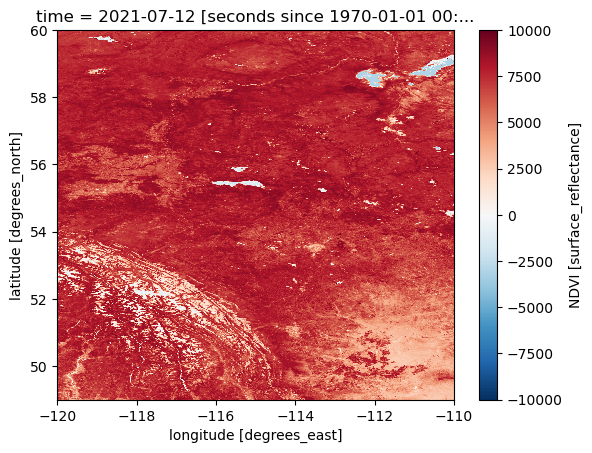

In [99]:
fig,ax = plt.subplots(1)
(modis_ndvi_dc_test.isel(time=3)['NDVI']).plot.imshow(ax=ax)


# year = 2020
# clipped = wf_df_years[(wf_df_years.fire_year == 2021) & (wf_df_years.fire_start_date.dt.month == 8)
#                       & (wf_df_years.fire_start_date.dt.day >= 15) & (wf_df_years.fire_start_date.dt.day <= 19)].copy()
# clipped.size_class = clipped.size_class.map(ord) - 65
# clipped.plot.scatter('fire_location_longitude','fire_location_latitude', c='size_class',cmap='BrBG', ax=ax)




In [106]:
probs = np.load('probs_aug_mid_clip.npy')

In [114]:
probs = np.load('probs_aug_jul2.npy')

In [122]:
probs = np.load('probs_aug_mid4.npy')

In [80]:
probs.shape

(5437458, 1)

In [124]:
probs_val = modis_ndvi_dc_test.isel(time=3)['NDVI'].copy()

In [125]:
probs_val = modis_ndvi_dc_test.isel(time=3)['NDVI'].copy()
probs_val.values = probs.reshape(2446, 2223)

(-120.0, -110.0)

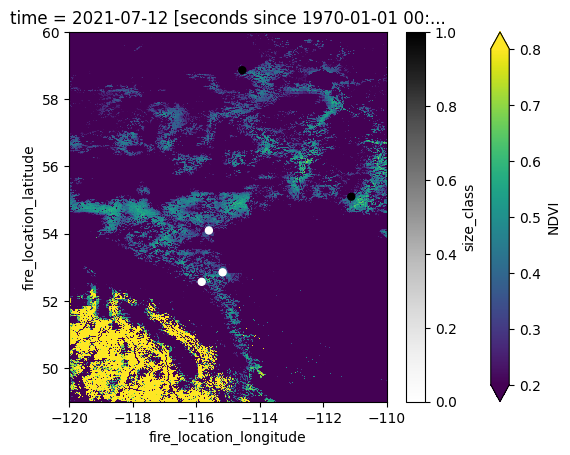

In [145]:
fig,ax = plt.subplots(1)

(probs_val+0.2).plot.imshow(ax=ax,vmin=0.2, vmax=0.8)

clipped = wf_df_years[(wf_df_years.fire_year == 2021) & (wf_df_years.fire_start_date.dt.month == 8)
                      & (wf_df_years.fire_start_date.dt.day >= 15) & (wf_df_years.fire_start_date.dt.day <= 17)].copy()
clipped.size_class = clipped.size_class.map(ord) - 65
clipped.plot.scatter('fire_location_longitude','fire_location_latitude', c='size_class', ax=ax, s=25)


# for i in inuit.geometry:
#     ax.scatter(i.x, i.y, color='red', s=7)
    
    
plt.ylim(49, 60)
plt.xlim(-120, -110)

(-120.0, -110.0)

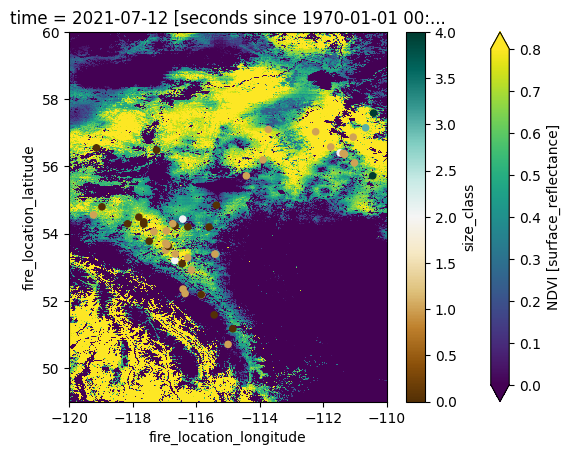

In [121]:
fig,ax = plt.subplots(1)

(probs_val).plot.imshow(ax=ax, vmin=0.0, vmax=0.8)

clipped = wf_df_years[(wf_df_years.fire_year == 2021) & (wf_df_years.fire_start_date.dt.month == 7)
                      & (wf_df_years.fire_start_date.dt.day >= 1) & (wf_df_years.fire_start_date.dt.day <= 4)].copy()
clipped.size_class = clipped.size_class.map(ord) - 65
clipped.plot.scatter('fire_location_longitude','fire_location_latitude', c='size_class',cmap='BrBG', ax=ax)


# for i in inuit.geometry:
#     ax.scatter(i.x, i.y, color='red', s=2)
    
    
plt.ylim(49, 60)
plt.xlim(-120, -110)

(-120.0, -110.0)

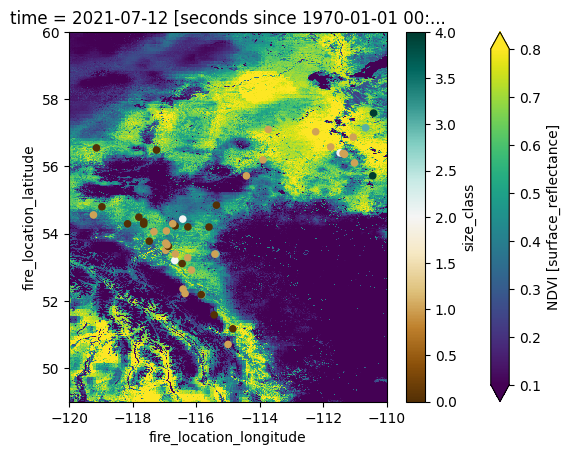

In [105]:
fig,ax = plt.subplots(1)

(probs_val).plot.imshow(ax=ax, vmin=0.1, vmax=0.8)

clipped = wf_df_years[(wf_df_years.fire_year == 2021) & (wf_df_years.fire_start_date.dt.month == 7)
                      & (wf_df_years.fire_start_date.dt.day >= 1) & (wf_df_years.fire_start_date.dt.day <= 4)].copy()
clipped.size_class = clipped.size_class.map(ord) - 65
clipped.plot.scatter('fire_location_longitude','fire_location_latitude', c='size_class',cmap='BrBG', ax=ax)


# for i in inuit.geometry:
#     ax.scatter(i.x, i.y, color='red', s=2)
    
    
plt.ylim(49, 60)
plt.xlim(-120, -110)

(-120.0, -110.0)

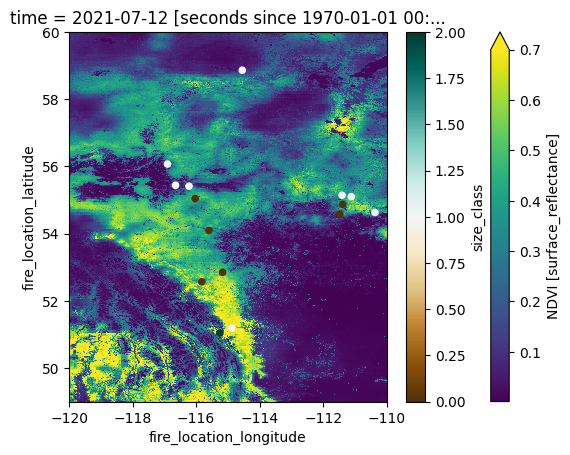

In [113]:
fig,ax = plt.subplots(1)

(probs_val).plot.imshow(ax=ax, vmax=0.7)

clipped = wf_df_years[(wf_df_years.fire_year == 2021) & (wf_df_years.fire_start_date.dt.month == 8)
                      & (wf_df_years.fire_start_date.dt.day >= 13) & (wf_df_years.fire_start_date.dt.day <= 17)].copy()
clipped.size_class = clipped.size_class.map(ord) - 65
clipped.plot.scatter('fire_location_longitude','fire_location_latitude', c='size_class',cmap='BrBG', ax=ax)


# for i in inuit.geometry:
#     ax.scatter(i.x, i.y, color='red', s=2)
    
    
plt.ylim(49, 60)
plt.xlim(-120, -110)

(-120.0, -110.0)

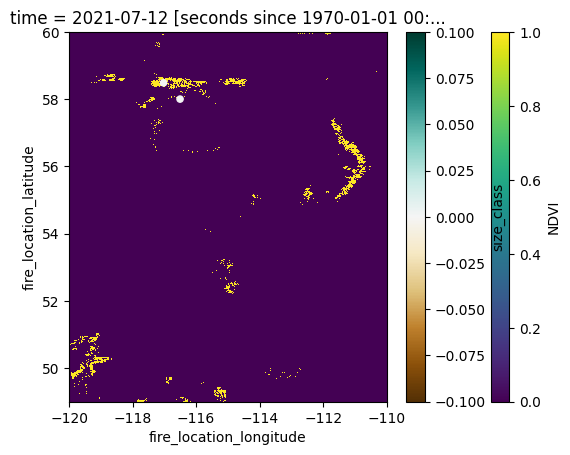

In [36]:
fig,ax = plt.subplots(1)

(probs_val>0.3).plot.imshow(ax=ax)

clipped = wf_df_years[(wf_df_years.fire_year == 2021) & (wf_df_years.fire_start_date.dt.month == 9)
                      & (wf_df_years.fire_start_date.dt.day >= 1) & (wf_df_years.fire_start_date.dt.day <= 5)].copy()
clipped.size_class = clipped.size_class.map(ord) - 65
clipped.plot.scatter('fire_location_longitude','fire_location_latitude', c='size_class',cmap='BrBG', ax=ax)


# for i in inuit.geometry:
#     ax.scatter(i.x, i.y, color='red', s=2)
    
plt.ylim(49, 60)
plt.xlim(-120, -110)

(-120.0, -110.0)

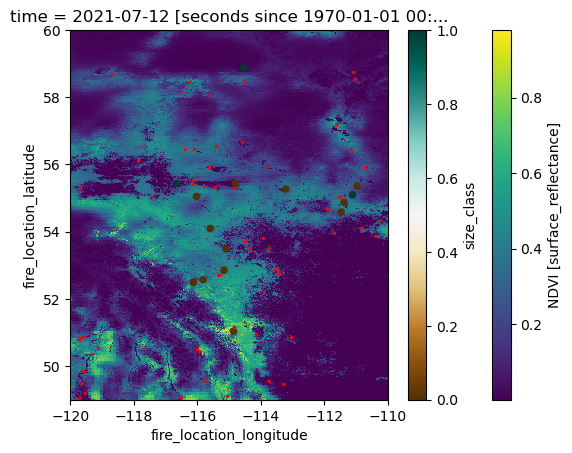

In [98]:
fig,ax = plt.subplots(1)

(probs_val).plot.imshow(ax=ax)

clipped = wf_df_years[(wf_df_years.fire_year == 2021) & (wf_df_years.fire_start_date.dt.month == 8)
                      & (wf_df_years.fire_start_date.dt.day >= 14) & (wf_df_years.fire_start_date.dt.day <= 17)].copy()
clipped.size_class = clipped.size_class.map(ord) - 65
clipped.plot.scatter('fire_location_longitude','fire_location_latitude', c='size_class',cmap='BrBG', ax=ax)


for i in inuit.geometry:
    ax.scatter(i.x, i.y, color='red', s=2)
    
    
plt.ylim(49, 60)
plt.xlim(-120, -110)

In [146]:
probs = np.load('probs_sept.npy')

probs_val = modis_ndvi_dc_test.isel(time=3)['NDVI'].copy()
probs_val.values = probs.reshape(2446, 2223)

(-120.0, -110.0)

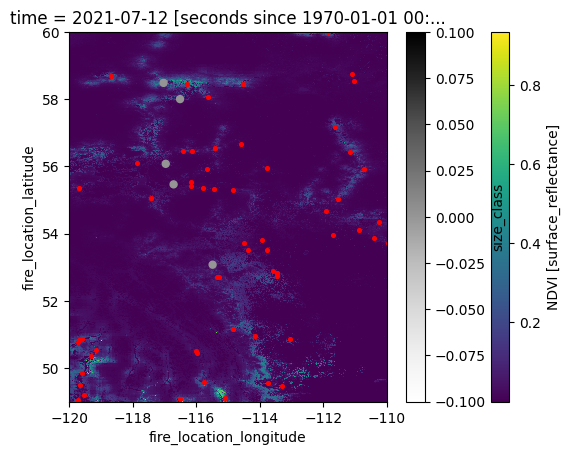

In [149]:
fig,ax = plt.subplots(1)

(probs_val).plot.imshow(ax=ax)

clipped = wf_df_years[(wf_df_years.fire_year == 2021) & (wf_df_years.fire_start_date.dt.month == 9)
                      & (wf_df_years.fire_start_date.dt.day >= 1) & (wf_df_years.fire_start_date.dt.day <= 10)].copy()
clipped.size_class = clipped.size_class.map(ord) - 65
clipped.plot.scatter('fire_location_longitude','fire_location_latitude', c='size_class', ax=ax, s=25)


for i in inuit.geometry:
    ax.scatter(i.x, i.y, color='red', s=7)
    
plt.ylim(49, 60)
plt.xlim(-120, -110)

In [85]:
for i in inuit.geometry:
    print(i)

POINT (-89.04324887899998 50.30992583)
POINT (-115.61821879799999 58.06435237400001)
POINT (-105.897007024 53.27662607000002)
POINT (-122.69817755000003 58.09196936500001)
POINT (-80.08869058599998 43.03765629200001)
POINT (-99.986613939 50.453814169)
POINT (-126.05609132400002 49.278057096)
POINT (-103.15756444499999 58.110963787)
POINT (-120.14902639500002 51.316895450000004)
POINT (-129.95733343900002 54.994412418000024)
POINT (-92.52151556799998 49.625475617999996)
POINT (-122.01808212899999 51.11304299400001)
POINT (-61.802421544000026 50.13365762500001)
POINT (-75.95910099999998 49.702264000000014)
POINT (-115.744969314 60.85471708799997)
POINT (-98.06537757799998 51.963173772000005)
POINT (-123.09769631400002 49.037882663000005)
POINT (-78.56483626599999 47.57754755799999)
POINT (-80.27345221899998 45.513984273000005)
POINT (-93.17098308099997 50.381459544999984)
POINT (-109.66956827400003 54.05012532500001)
POINT (-89.262676043 48.35433570499998)
POINT (-80.11908300599998 43.04